# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhamad Reza Al Ramadhan
- **Email:** rezaalramadhan@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/reza_al_ramadhan/

## Menentukan Pertanyaan Bisnis

- Apa kategori produk yang paling banyak dan paling sedikit terjual?
- Di wilayah mana saja yang memiliki jumlah penjualan yang paling banyak?
- Bagaimana sebaran metode pembayaran yang digunakan dalam data transaksi customer?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.show_versions()

/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(



INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.11.11.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.1.85+
Version               : #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.2
dateutil              : 2.8.2
setuptools            : 75.1.0
pip                   : 24.1.2
Cython                : 3.0.11
pytest                : 8.3.4
hypothesis            : None
sphinx                : 8.1.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.0
html5lib              : 1.1
pymysql               : None
psycopg2   

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [5]:
%cd /content/drive/My Drive/Colab Notebooks/Dicoding 2025/E-Commerce Public Dataset

/content/drive/My Drive/Colab Notebooks/Dicoding 2025/E-Commerce Public Dataset


#### **Impor data customer**

In [6]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### **Impor data geolocation**

In [7]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### **Impor data order_item**

In [8]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### **Impor data order_payment**

In [9]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### **Impor data order_review**

In [10]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### **Impor data order**

In [11]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### **Impor data product**

In [12]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### **Impor data seller**

In [13]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Impor data product_category_name_translation**

In [14]:
product_category_name_translation_df = \
  pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Data lokasi customer dapat digunakan untuk mendapatkan wilayah mana saja yang memiliki jumlah penjualan yang paling banyak.
- Data order item dapat digunakan untuk mendapatkan barang-barang apa saja yang paling banyak terjual.
- Data order payment dapat digunakan untuk mendapatkan sebaran metode pembayaran yang telah digunakan.
- Nama-nama kategori produk dari data product dicatat dalam bahasa Portugis. Untungnya, Ada data product_category_name_translationn dapat digunakan untuk menerjemahkan data-data tersebut dalam bahasa Inggris agar dapat mudah dipahami bagi semua orang.

### Assessing Data

Cek semua tabel apakah ada penggunaan tipe data yang salah, data hilang/kosong, atau data duplikat. Lalu, cek menggunakan parameter statistik untuk semua kolom data yang berbentuk data numerik.

####**Menilai tabel customers_df**

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [17]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### **Menilai tabel geolocation_df**

In [19]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [20]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [21]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [22]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### **Menilai tabel order_items_df**

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [25]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Menilai tabel order_payments_df**

In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [29]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### **Menilai tabel order_reviews_df**

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [33]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### **Menilai tabel orders_df**

In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [37]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### **Menilai tabel products_df**

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Karena ada data yang kosong/hilang. Perlu dicek kondisi kolom data yang datanya kosong/hilang

Cek data products_df dengan nilai kolom product_category_name yang kosong/hilang.

In [41]:
products_df[products_df.isna().product_category_name]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [42]:
products_df[products_df.isna().product_category_name].isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


Terlihat, bahwa dari data products_df yang difilter berdasarkan data kolom product_category_name yang kosong/hilang data product_name_lenght, product_description_lenght, dan product_photos_qty juga kosong/hilang dengan jumlah yang sama. Hal ini, menandakan jika data products_df difilter dengan salah satu nama kolom yang telah disebutkan dengan kriteria data kosong/hilang maka keempat kolom data tersebut pasti data kosong/hilang.

Cek data products_df dengan nilai kolom product_width_cm yang kosong/hilang.

In [43]:
products_df[products_df.isna().product_width_cm]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terlihat, bahwa dari data products_df yang difilter berdasarkan data kolom product_width_cm yang kosong/hilang data product_weight_g, product_length_cm, dan product_height_cm juga kosong/hilang dengan jumlah yang sama. Hal ini, menandakan jika data products_df difilter dengan salah satu nama kolom yang telah disebutkan dengan kriteria data kosong/hilang maka keempat kolom data tersebut pasti data kosong/hilang.

In [44]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### **Menilai tabel sellers_df**

In [46]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [47]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [48]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Menilai tabel product_category_name_translation_df**

In [50]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [52]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak ditemukan permasalahaan yang ada pada data customers_df.
- Data geolocation_df memiliki data duplikat.
- Data order_items_df memiliki kesalahan pemilihan tipe data pada kolom shipping_limit_date. Seharusnya, Kolom tersebut menggunakan tipe data datetime.
- Tidak ditemukan permasalahaan yang ada pada data order_payments_df.
- Data order_reviews_df memiliki kesalahan pemilihan tipe data pada kolom review_creation_date dan review_answer_timestamp. Seharusnya, Kolom-kolom tersebut menggunakan tipe data datetime.
- Data orders_df memiliki kesalahan pemilihan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Seharusnya, Kolom-kolom tersebut menggunakan tipe data datetime.
- Data products_df memiliki kesalahan pemilihan tipe data pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty. Seharusnya, Kolom-kolom tersebut menggunakan tipe data integer.
- Data products_df memiliki data yang kosong/hilang pada kolom product_name_lenght, product_description_lenght, product_photos_qty, product_length_cm, product_height_cm, dan product_width_cm.
- Tidak ditemukan permasalahaan yang ada pada data sellers_df.
- Tidak ditemukan permasalahaan yang ada pada data product_category_name_translation_df.


### Cleaning Data

#### **Membersihkan tabel geolocation_df**

Hitung data duplikat pada tabel geolocation_df

In [54]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


Tampilkan data duplikat pada tabel geolocation_df

In [55]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Bersihkan data duplikat pada tabel geolocation_df

In [56]:
geolocation_df.drop_duplicates(inplace=True)

Hitung data duplikat pada tabel geolocation_df setelah dibersihkan

In [57]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### **Membersihkan tabel order_items_df**

Ganti tipe data dari shipping_limit_date dengan tipe data datetime.

In [58]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

Cek kembali apakah tipe data pada kolom tersebut sudah benar.

In [59]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### **Membersihkan tabel order_reviews_df**

Ganti tipe data dari review_creation_date dan review_answer_timestamp dengan tipe data datetime

In [60]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Cek kembali apakah tipe data pada kolom-kolom tersebut sudah benar.

In [61]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### **Membersihkan tabel orders_df**

Ganti tipe data dari order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date dengan tipe data datetime

In [62]:
datetime_columns = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Cek kembali apakah tipe data pada kolom-kolom tersebut sudah benar.

In [63]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### **Membersihkan tabel products_df**

Ganti isi kolom product_category_name menggunakan data product_category_name_translation_df untuk mendapatkan nama produk dalam bahasa Inggris.

In [64]:
products_df = pd.merge(products_df,
                       product_category_name_translation_df,
                       left_on='product_category_name',
                       right_on='product_category_name',
                       how='left')

products_df['product_category_name'] = (
  products_df['product_category_name_english']
  if products_df['product_category_name_english'] is not None
  else products_df['product_category_name'])

products_df.drop(columns=['product_category_name_english'], inplace=True)

Imputasi Missing value

Ganti Missing values dari product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan angka 0

In [65]:
fillna_0_columns = ['product_name_lenght',
                    'product_description_lenght',
                    'product_photos_qty',
                    'product_weight_g',
                    'product_length_cm',
                    'product_height_cm',
                    'product_width_cm']

for column in fillna_0_columns:
  products_df[column] = products_df[column].fillna(0)

Ganti tipe data dari product_name_lenght, product_description_lenght, dan product_photos_qty dengan tipe data integer

In [66]:
integer_columns = ['product_name_lenght',
                   'product_description_lenght',
                   'product_photos_qty']

products_df = products_df.astype(
    {column:'int' for column in integer_columns})

Cek kembali apakah tipe data pada kolom-kolom tersebut sudah benar.

In [67]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32951 non-null  int64  
 3   product_description_lenght  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


**Insight:**
- Semua kolom yang memiliki tipe data yang salah telah dikoreksi.
- Semua data kosong/hilang telah terisi.

## Exploratory Data Analysis (EDA)

### Explore kategori produk berdasarkan jumlah penjualan yang telah terjadi

Gabungkan data order_items_df dengan products_df.

In [68]:
order_products_df = pd.merge(order_items_df,
                             products_df,
                             left_on='product_id',
                             right_on='product_id',
                             how='inner')
order_products_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58,598,4,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56,239,2,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59,695,2,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42,480,1,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59,409,1,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43,1002,3,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31,232,1,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43,869,1,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56,1306,1,100.0,20.0,20.0,20.0


Hitung jumlah penjualan yang telah terjadi berdasarkan nama produknya

In [69]:
product_order_counts = order_products_df.groupby(
    by="product_category_name").order_id.count()
product_order_counts.rename("order_count", inplace=True)
product_order_counts = product_order_counts.sort_values(ascending=False)

Tampilkan 10 produk dengan penjualan terbanyak

In [70]:
product_order_counts.head(10)

,order_count
product_category_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


Tampilkan 10 produk dengan penjualan terkecil

In [71]:
product_order_counts.tail(10)

,order_count
product_category_name,
furniture_mattress_and_upholstery,38
music,38
flowers,33
fashion_sport,30
home_comfort_2,30
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14
fashion_childrens_clothes,8


**Insight:**
- Kategori produk yang paling banyak terjual adalah bed bath table dengan order berjumlah 11115.
- Kategori produk yang paling sedikit terjual adalah security and services dengan order berjumlah 2.

### Explore jumlah penjualan yang telah terjadi berdasarkan wilayahnya

Gabungkan data customers_df, orders_df, dan order_items_df menjadi satu kesatuan.

In [72]:
customer_order_items_df = pd.merge(customers_df,
                                   orders_df,
                                   left_on='customer_id',
                                   right_on='customer_id',
                                   how='inner')
customer_order_items_df = pd.merge(customer_order_items_df,
                                   order_items_df,
                                   left_on='order_id',
                                   right_on='order_id',
                                   how='inner')
customer_order_items_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


Hitung jumlah penjualan yang telah terjadi berdasarkan nama kota.



In [73]:
order_items_by_city = customer_order_items_df.groupby(
    by="customer_city").order_item_id.count().sort_values(ascending=False)
order_items_by_city.rename("order_count", inplace=True)
order_items_by_city

,order_count
customer_city,
sao paulo,17808
rio de janeiro,7837
belo horizonte,3144
brasilia,2392
curitiba,1751
...,...
ibipeba,1
ibiracatu,1
sacra familia do tingua,1


Hitung jumlah penjualan yang telah terjadi berdasarkan nama state.



In [74]:
order_items_by_state = customer_order_items_df.groupby(
    by="customer_state").order_item_id.count().sort_values(ascending=False)
order_items_by_state.rename("order_count", inplace=True)
order_items_by_state

,order_count
customer_state,
SP,47449
RJ,14579
MG,13129
RS,6235
PR,5740
SC,4176
BA,3799
DF,2406
GO,2333


**Insight:**
- Jumlah order terbanyak berdasarkan kotanya berada di kota sao paulo dengan order sebanyak 17808.
- Jumlah order terbanyak berdasarkan statenya berada di state berkode SP dengan order sebanyak 47449.

### Explore sebaran metode pembayaran yang digunakan dalam data transaksi customer

Hitung jumlah penjualan yang telah terjadi berdasarkan metode pembayarannya.

In [75]:
payment_type_counts = order_payments_df.groupby(
    by="payment_type").order_id.count()
payment_type_counts.rename("order_count", inplace=True)
payment_type_counts = payment_type_counts.sort_values(ascending=False)
payment_type_counts

,order_count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Hitung jumlah penjualan yang terjadi berdasarkan metode pembayaran beserta jumlah cicilannya.

In [76]:
payment_installment_counts = order_payments_df.groupby(
    ["payment_type", 'payment_installments']).order_id.count()
payment_installment_counts.rename("order_count", inplace=True)
payment_installment_counts

payment_type  payment_installments
boleto        1                       19784
credit_card   0                           2
              1                       25455
              2                       12413
              3                       10461
              4                        7098
              5                        5239
              6                        3920
              7                        1626
              8                        4268
              9                         644
              10                       5328
              11                         23
              12                        133
              13                         16
              14                         15
              15                         74
              16                          5
              17                          8
              18                         27
              20                         17
              21                          3
              22                          1
              23                          1
              24                         18
debit_card    1                        1529
not_defined   1                           3
voucher       1                        5775
Name: order_count, dtype: int64

Karena ada data payment_installments == 0 dan payment_type == 'credit_card'. Cek data yang memiliki payment_installments == 0.

In [77]:
order_payments_df[order_payments_df.payment_installments == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


Kemungkinan ada kesalahan pengisian data yang menyebabkan payment_installments bernilai 0. Seharusnya, jumlah cicilan Credit Card minimal 1. Oleh karena itu, akan diganti data payment_installments bernilai 0 menjadi payment_installments bernilai 1. Alasannya, karena payment_installments bernilai 1 merupakan mode berdasarkan frekuensi kemunculannya dan payment_installments bernilai 0 merupakan data yang berjumlah kecil dan tidak signifikan.

In [78]:
order_payments_df['payment_installments'] = \
  order_payments_df['payment_installments'].replace(0, 1)

Hitung kembali jumlah penjualan yang telah terjadi berdasarkan metode pembayarannya.

In [79]:
payment_type_counts = order_payments_df.groupby(
    by="payment_type").order_id.count()
payment_type_counts.rename("order_count", inplace=True)
payment_type_counts = payment_type_counts.sort_values(ascending=False)
payment_installment_counts = order_payments_df.groupby(
    ["payment_type", 'payment_installments']).order_id.count()
payment_installment_counts.rename("order_count", inplace=True)
payment_installment_counts

payment_type  payment_installments
boleto        1                       19784
credit_card   1                       25457
              2                       12413
              3                       10461
              4                        7098
              5                        5239
              6                        3920
              7                        1626
              8                        4268
              9                         644
              10                       5328
              11                         23
              12                        133
              13                         16
              14                         15
              15                         74
              16                          5
              17                          8
              18                         27
              20                         17
              21                          3
              22                          1
              23                          1
              24                         18
debit_card    1                        1529
not_defined   1                           3
voucher       1                        5775
Name: order_count, dtype: int64

Urutkan jumlah penjualan menggunakan metode pembayaran Credit Card berdasarkan jumlah cicilannya.

In [80]:
payment_installment_counts['credit_card'].sort_values(ascending=False)

,order_count
payment_installments,
1,25457
2,12413
3,10461
4,7098
10,5328
5,5239
8,4268
6,3920
7,1626


**Insight:**
- Metode pembayaran paling banyak yang digunakan adalah Credit Card dengan jumlah order sebanyak 76795.
- Metode pembayaran paling banyak kedua yang digunakan adalah Boleto (Sistem pembayaran di Brasil) dengan jumlah order sebanyak 19784.
- Hanya metode pembayaran Credit Card yang menawarkan customer pilihan cicilan pembayaran.
- Jumlah cicilan pembayaran Credit Card yang terbanyak yang digunakan adalah 1 kali cicilan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kategori produk yang paling banyak dan paling sedikit terjual?

Analisis ini dilakukan untuk mengetahui kategori produk yang paling banyak dan paling sedikit terjual berdasarkan jumlah penjualan yang telah terjadi.

Visualisasikan 10 kategori produk yang paling banyak dan paling sedikit terjual berdasarkan jumlah penjualan yang telah terjadi.

<ipython-input-81-06b350cd8abb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_selling_products,
<ipython-input-81-06b350cd8abb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_selling_products,


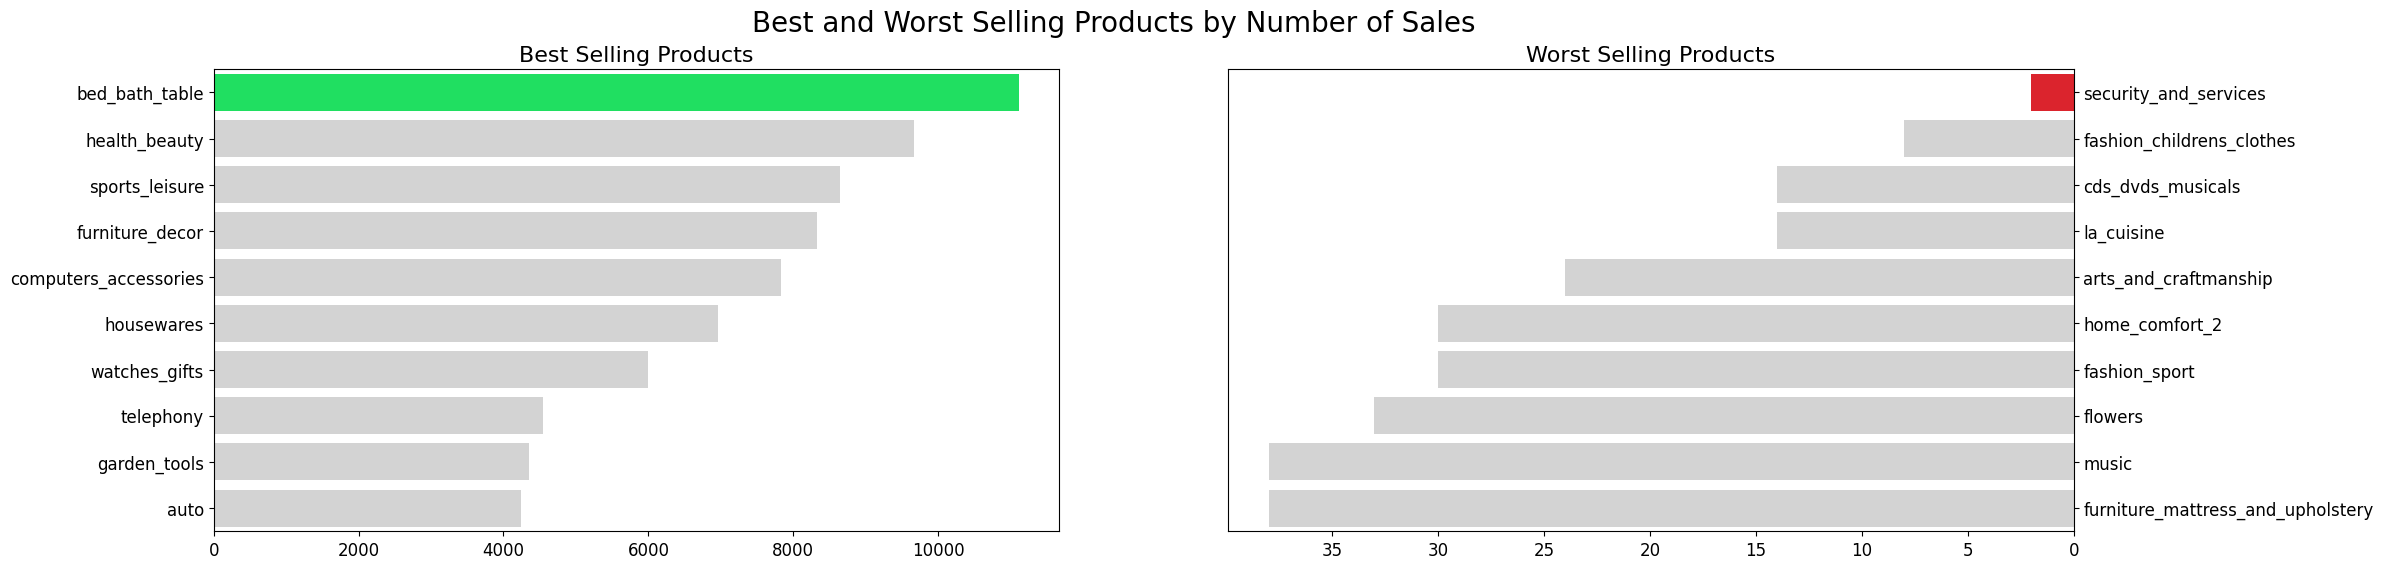

In [81]:
n_top_products = 10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

best_selling_products = product_order_counts.reset_index()
best_selling_products = best_selling_products.head(n_top_products)
colors_best = ["#00FF57"] + ["#D3D3D3"] * (n_top_products - 1)

sns.barplot(data=best_selling_products,
            x="order_count",
            y="product_category_name",
            palette=colors_best,
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Products", loc="center", fontsize=16)
ax[0].tick_params(axis ='both', labelsize=12)

worst_selling_products = product_order_counts.reset_index()
worst_selling_products = worst_selling_products.tail(n_top_products)[::-1]
colors_worst = ["#F90611"] + ["#D3D3D3"] * (n_top_products - 1)

sns.barplot(data=worst_selling_products,
            x="order_count",
            y="product_category_name",
            palette=colors_worst,
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Selling Products", loc="center", fontsize=16)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis ='both', labelsize=12)

plt.suptitle("Best and Worst Selling Products by Number of Sales",
             fontsize=20)
plt.show()

**Insight:**
- Kategori produk yang paling banyak terjual adalah bed bath table.
- Kategori produk yang paling sedikit terjual adalah security and services.

### Pertanyaan 2: Di wilayah mana saja yang memiliki jumlah penjualan yang paling banyak?

Analisis ini dilakukan untuk mengetahui wilayah mana saja  memiliki jumlah penjualan paling banyak.

Visualisasikan jumlah penjualan yang telah terjadi berdasarkan nama kota.

<ipython-input-82-1523838fbc39>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_items_by_city.reset_index().head(n_top_cities),


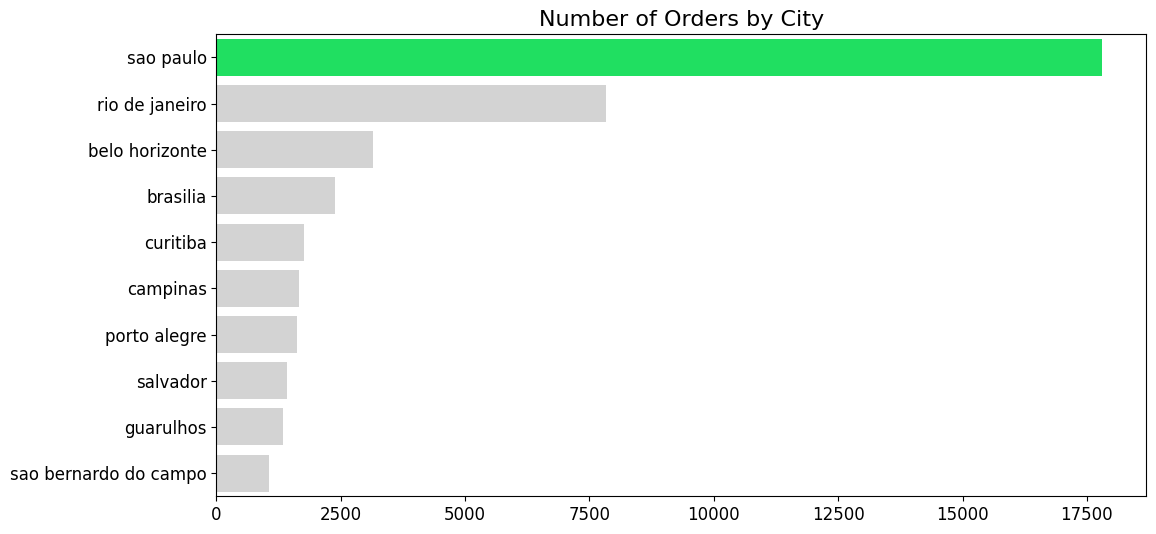

In [82]:
n_top_cities = 10
plt.figure(figsize=(12, 6))

colors= ["#00FF57"] + ["#D3D3D3"] * (n_top_cities - 1)

sns.barplot(data=order_items_by_city.reset_index().head(n_top_cities),
            x="order_count",
            y="customer_city",
            palette=colors)

plt.title("Number of Orders by City", loc="center", fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Visualisasikan jumlah penjualan yang telah terjadi berdasarkan nama state.

<ipython-input-83-a488da7c9d25>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_items_by_state.reset_index().head(n_top_states),


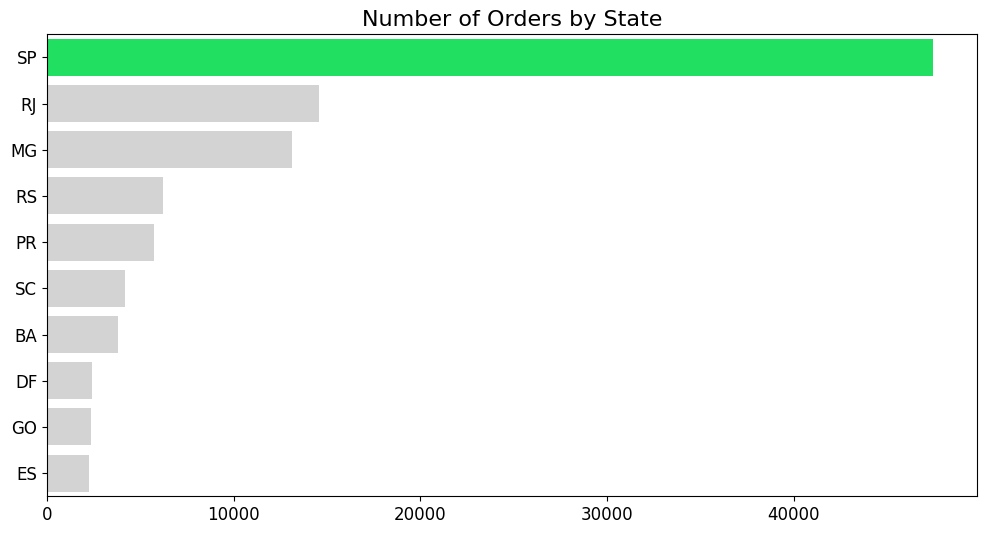

In [83]:
n_top_states = 10
plt.figure(figsize=(12, 6))

colors= ["#00FF57"] + ["#D3D3D3"] * (n_top_states - 1)

sns.barplot(data=order_items_by_state.reset_index().head(n_top_states),
            x="order_count",
            y="customer_state",
            palette=colors)

plt.title("Number of Orders by State", loc="center", fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='both', labelsize=12)
plt.show()

**Insight:**
- Kota dengan jumlah penjualan yang paling banyak adalah sao paulo.
- State dengan jumlah penjualan yang paling banyak adalah state berkode SP.

### Pertanyaan 3: Bagaimana sebaran metode pembayaran yang digunakan dalam data transaksi customer?

Analisis ini dilakukan untuk mengetahui jenis metode pembayaran yang digunakan customer berdasarkan jumlah penjualan yang telah terjadi.

<ipython-input-84-beccebd45c8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_type_counts.reset_index(),


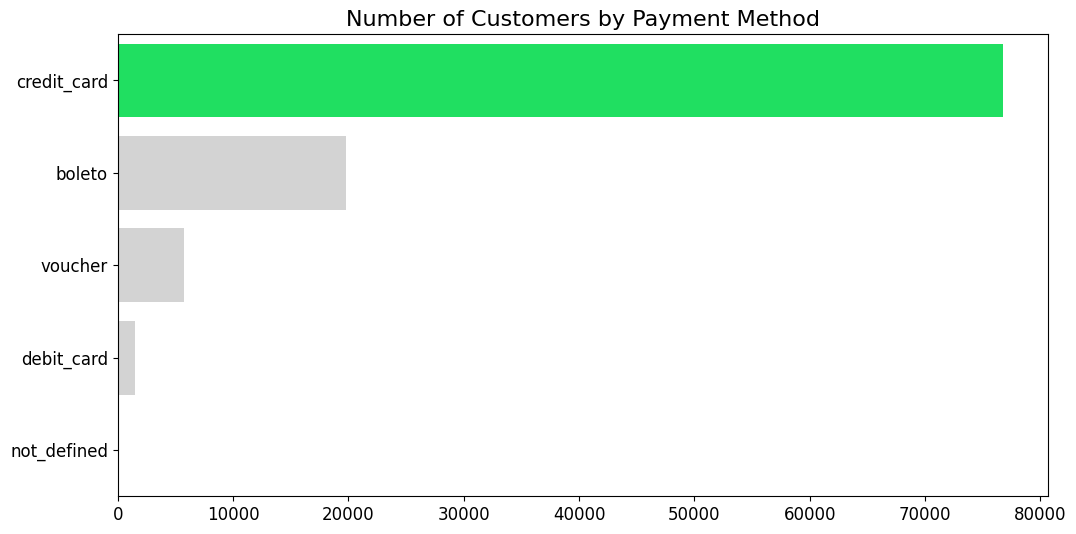

In [84]:
plt.figure(figsize=(12, 6))

colors= ["#00FF57"] + ["#D3D3D3"] * (len(payment_type_counts) - 1)

sns.barplot(data=payment_type_counts.reset_index(),
            x="order_count",
            y="payment_type",
            palette=colors)

plt.title("Number of Customers by Payment Method", loc="center", fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Analisis ini dilakukan untuk mengetahui jumlah cicilan yang ambil dengan metode pembayaran credit card yang digunakan customer berdasarkan jumlah penjualan yang telah terjadi.

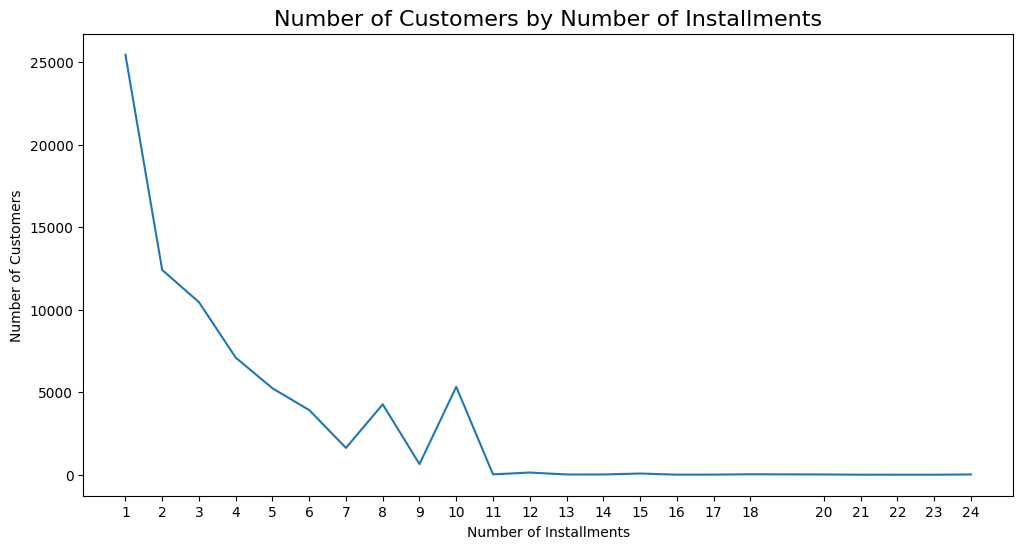

In [85]:
payment_installment_credit_card_plot = \
  payment_installment_counts['credit_card'].reset_index()

plt.figure(figsize=(12, 6))

plt.plot(payment_installment_credit_card_plot["payment_installments"],
         payment_installment_credit_card_plot["order_count"])
plt.xticks(payment_installment_credit_card_plot["payment_installments"])
plt.xlabel("Number of Installments")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Number of Installments",
          loc="center", fontsize=16)
plt.show()

**Insight:**
- Metode pembayaran paling banyak yang digunakan adalah Credit Card.
- Metode pembayaran paling banyak kedua yang digunakan adalah Boleto (Sistem pembayaran di Brasil).
- Secara umum, Semakin banyak jumlah cicilan Credit Card cenderung semakin sedikit jumlah ordernya.

## Analisis Lanjutan (Opsional)

### RFM Analysis

RFM Analysis, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

#### Hitung nilai Recency, Frequency, dan Monetary

In [86]:
rfm_df = customer_order_items_df.groupby(by="customer_unique_id").agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"})
rfm_df.rename(columns={
    "order_purchase_timestamp": "last_order_purchase_timestamp",
    "order_id": "frequency",
    "price": "monetary"}, inplace=True)
last_order_date = max(orders_df['order_purchase_timestamp'])
rfm_df["recency"] = rfm_df["last_order_purchase_timestamp"].apply(
    lambda x: (last_order_date - x).days)
rfm_df.drop("last_order_purchase_timestamp", axis=1, inplace=True)
rfm_df.head(5)

,frequency,monetary,recency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
0000f46a3911fa3c0805444483337064,1,69.00,585
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,369
0004aac84e0df4da2b147fca70cf8255,1,180.00,336


#### Visualisasi distribusi perhitungan Recency, Frequency, dan Monetary

Visualisasikan distribusi perhitungan Recency, Frequency, dan Monetary.

Text(0.5, 0, '')

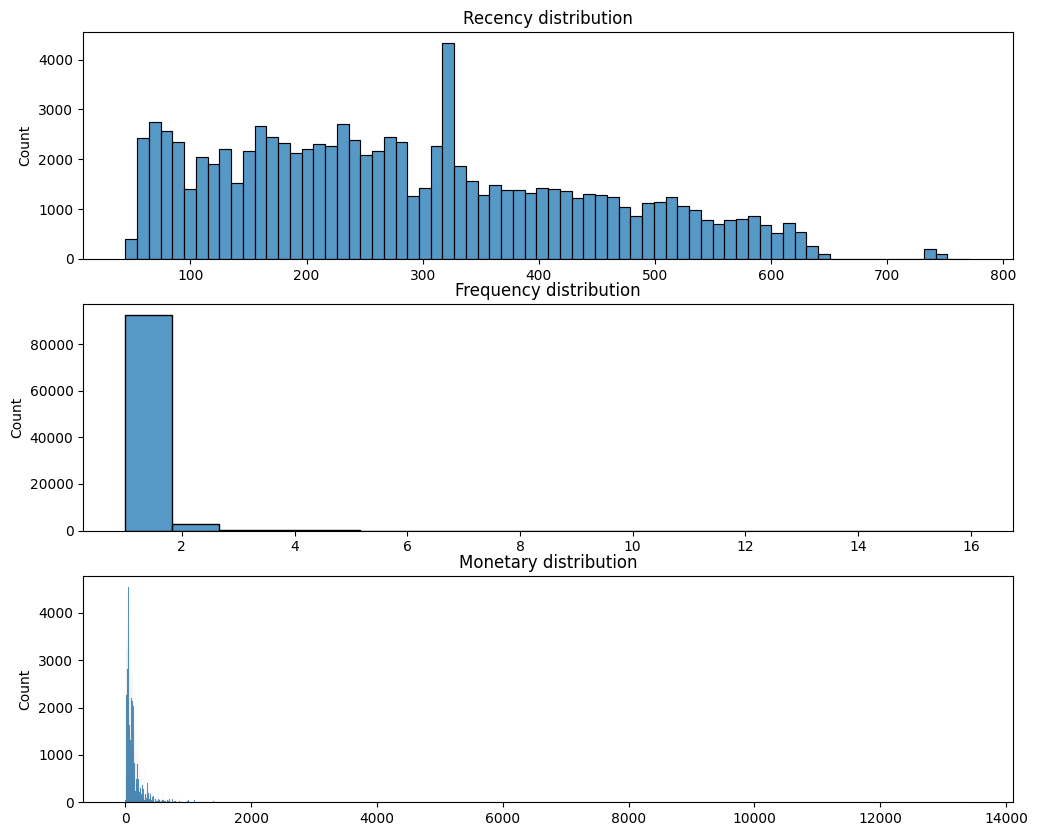

In [87]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
sns.histplot(rfm_df['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

plt.subplot(3, 1, 2)
sns.histplot(rfm_df['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

plt.subplot(3, 1, 3)
sns.histplot(rfm_df['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

Terlihat, bahwa hasil perhitungan Recency, Frequency, dan Monetary condong ke kanan. Namun, distribusi Frequency terlihat sangat condong ke kanan. Oleh karena itu, perlu dilakukan analisis tambahan.

Tampilkan hasil perhitungan Frequency berdasarkan jumlah customer.

In [88]:
rfm_df.reset_index().groupby(by="frequency").customer_unique_id.count()

,customer_unique_id
frequency,
1,92507
2,2673
3,192
4,29
5,9
6,5
7,3
9,1
16,1


Terlihat, bahwa sebagian besar customer memiliki frequency = 1, dan semakin sedikit customer dengan frequency yang lebih tinggi. Diperlukan perhitungan RFM score khusus untuk menangani yang distribusi frequency yang sangat condong ke kanan.

#### Hitung RFM (Recency, Frequency, and Monetary) score

Hitung RFM (Recency, Frequency, and Monetary) score dari hasil perhitungan Recency, Frequency, dan Monetary dengan menggunakan teknik binning. Perhitungan Recency score dan Monetary score dihitung menggunakan Quantile Binning. Sedangkan, Frequency score dihitung menggunakan Custom Binning dengan kriteria sebagai berikut:
- Bin 1: Frequency = 1 → Customer yang melakukan order sekali.
- Bin 2: Frequency = 2 → Customer yang mulai melakukan order berulang.
- Bin 3: Frequency = 3-4 → Customer dengan aktivitas sedang.
- Bin 4: Frequency = 5-6 → Customer yang lebih aktif.
- Bin 5: Frequency ≥ 7 → Customer yang sangat aktif.

In [89]:
rfm_df['r_score'] = pd.qcut(
    rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['f_score'] = pd.cut(
    rfm_df['frequency'], bins=[0, 1, 2, 4, 6, 16], labels=[1, 2, 3, 4, 5])
rfm_df['m_score'] = pd.qcut(
    rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_df.head(5)

,frequency,monetary,recency,r_score,f_score,m_score
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,4,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,4,1,1
0000f46a3911fa3c0805444483337064,1,69.00,585,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,369,2,1,1
0004aac84e0df4da2b147fca70cf8255,1,180.00,336,2,1,5


#### Segmentasi Customer

**Kriteria Segmentasi Customer**

Segmentasi Customer dilakukan berdasarkan analisis **RFM (Recency, Frequency, Monetary)**, dengan definisi segmen sebagai berikut:

### 1. Frequent Customers
- **Kriteria**:
  - `r_score >= 3` dan `f_score >= 2`
- **Deskripsi**:
  Customer yang sering melakukan transaksi, meskipun nilai transaksi mungkin tidak selalu tinggi. Kelompok ini menunjukkan tingkat loyalitas yang signifikan.

---

### 2. High Value Lost Customers
- **Kriteria**:
  - `r_score <= 2` dan `m_score >= 3`
- **Deskripsi**:
  Customer yang sebelumnya bernilai tinggi (monetary besar) tetapi sudah lama tidak aktif.

---

### 3. Low Value Lost Customers
- **Kriteria**:
  - `r_score <= 2` dan `m_score < 3`
- **Deskripsi**:
  Customer dengan nilai rendah (monetary kecil) yang sudah lama tidak aktif. Potensi ROI untuk segmen ini lebih rendah dibandingkan segmen lainnya.

---

### 4. Active Big Spenders
- **Kriteria**:
  - `m_score >= 4` dan `r_score >= 3`
- **Deskripsi**:
  Customer yang memiliki pengeluaran besar dan masih aktif baru-baru ini. Ini adalah salah satu segmen dengan nilai tertinggi bagi bisnis.

---

### 5. High Value Recent Customers
- **Kriteria**:
  - `r_score >= 4` dan `m_score >= 3`
- **Deskripsi**:
  Customer baru yang sudah menunjukkan potensi besar dengan pengeluaran yang signifikan (monetary besar).

---

### 6. Low Value Recent Customers
- **Kriteria**:
  - `r_score >= 4` dan `m_score < 3`
- **Deskripsi**:
  Customer baru dengan nilai transaksi rendah (monetary kecil). Kelompok ini perlu didorong untuk meningkatkan monetary mereka.

---

### 7. Others
- **Kriteria**:
  - Tidak memenuhi semua kriteria di atas.
- **Deskripsi**:
  Customer yang tidak menonjol di bagian Recency, Frequency, maupun Monetary.

---

Segmentasi ini dirancang untuk memberikan pemahaman mendalam tentang customer, memungkinkan strategi pemasaran yang lebih terarah dan efektif.

In [93]:
def segment_rfm(row):
  if (row['r_score'] >= 3 and
      row['f_score'] >= 2):
    return 'Frequent Customers'
  if (row['r_score'] <= 2 and
      row['m_score'] >= 3):
    return 'High Value Lost Customers'
  if (row['r_score'] <= 2 and
      row['m_score'] < 3):
    return 'Low Value Lost Customers'
  if (row['m_score'] >= 4 and
      row['r_score'] >= 3):
    return 'Active Big Spenders'
  if (row['m_score'] >= 4 and
      row['r_score'] < 3):
    return 'Inactive Big Spenders'
  if (row['r_score'] >= 4 and
      row['m_score'] >= 3):
    return 'High Value Recent Customers'
  if (row['r_score'] >= 4 and
      row['m_score'] < 3):
    return 'Low Value Recent Customers'
  return 'Others'

rfm_df['customer_segment'] = rfm_df.apply(segment_rfm, axis=1)
rfm_df.head()

,frequency,monetary,recency,r_score,f_score,m_score,customer_segment
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,4,1,4,Active Big Spenders
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,4,1,1,Low Value Recent Customers
0000f46a3911fa3c0805444483337064,1,69.00,585,1,1,2,Low Value Lost Customers
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,369,2,1,1,Low Value Lost Customers
0004aac84e0df4da2b147fca70cf8255,1,180.00,336,2,1,5,High Value Lost Customers


Tampilkan jumlah customer berdasarkan hasil segmentasi customer yang telah dibuat.

In [119]:
customer_segments_df = rfm_df.reset_index().groupby(
    by="customer_segment").customer_unique_id.count().rename(
        "customer_count").sort_values(ascending=False)
customer_segments_df = customer_segments_df.reset_index()
customer_segments_df["customer_count_percentage"] = (
  customer_segments_df["customer_count"] /
  customer_segments_df["customer_count"].sum()) * 100
customer_segments_df

,customer_segment,customer_count,customer_count_percentage
0,Active Big Spenders,21913,22.964787
1,High Value Lost Customers,21821,22.868371
2,Low Value Lost Customers,16155,16.930413
3,Low Value Recent Customers,15361,16.098302
4,Others,11407,11.954517
5,High Value Recent Customers,6876,7.206036
6,Frequent Customers,1887,1.977573


Visualisasi jumlah customer berdasarkan hasil segmentasi customer yang telah dibuat.

<ipython-input-120-85a1da4d0006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_segments_df,


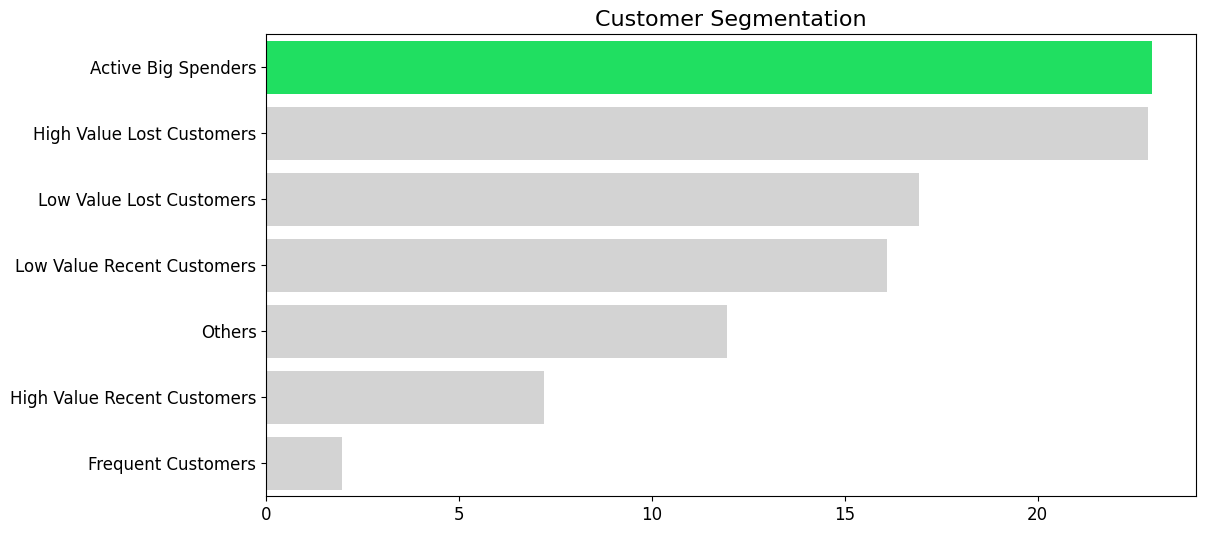

In [120]:
plt.figure(figsize=(12, 6))

colors= ["#00FF57"] + ["#D3D3D3"] * (len(customer_segments_df) - 1)

sns.barplot(data=customer_segments_df,
            x="customer_count_percentage",
            y="customer_segment",
            palette=colors)

plt.title("Customer Segmentation", loc="center", fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='both', labelsize=12)
plt.show()

**Insight:**
- Active Big Spenders (22.96%) merupakan customer yang paling besar yang menandakan ada banyak customer yang mau mengeluarkan uang untuk melakukan order.
- High Value Lost Customers (22.86%) lebih banyak daripada Low Value Lost Customers (16.93%) yang menandakan ada potensi besar untuk menarik Lost Customers untuk kembali melakukan order.
- High Value Recent Customers (7.20%) lebih sedikit daripada Low Value Recent Customers (16.09%) yang menandakan bahwa customer baru biasanya tidak melakukan order yang besar.
- Frequent Customers (1.97%) merupakan segmen customer yang paling kecil yang menandakan para customer tidak terlalu sering melakukan order.
- Others atau customer yang tidak teridentifikasi (11.95%) bahkan lebih banyak daripada Frequent Customers.

## Conclusion

- Dari data penjualan tersebut, bed bath table merupakan kategori produk yang paling banyak terjual. Sedangkan, security and services merupakan kategori produk yang paling sedikit terjual.
- Kota dengan jumlah penjualan yang paling banyak adalah Sao Paulo dan State dengan jumlah penjualan yang paling banyak adalah state berkode SP.
- Metode pembayaran paling banyak yang digunakan adalah Credit Card dan disusul dengan Boleto (Sistem pembayaran di Brasil). Secara umum, customer cenderung lebih memilih jumlah cicilan Credit Card yang sedikit dibandingkan dengan jumlah cicilan Credit Card yang banyak.